In [2]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import the function
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model_new import extract_time_series
from extract_for_model_new import scale_time_series

In [3]:

input_path = '/home/reference/data_interim/software_private_annual_revised_income_statements_INTERIM.csv'

features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
ids        = []
year_min   = 2014
steps      = -1
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset = pd.concat([train_df,test_df])



#dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (1278, 7)
Size AFTER dropping NA: (1264, 7)
TEST  set size: (276, 7)
TRAIN set size: (988, 7)
TEST is 22% of all available datapoints


In [5]:
input_path_bal = '/home/reference/data_interim/software_private_annual_revised_balance_sheets_INTERIM.csv'

features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
ids        = []
year_min   = 2014
steps      = -1
unitshift = 0
train_bal_df, test_bal_df = extract_time_series(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal = pd.concat([train_bal_df,test_bal_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (1279, 6)
Size AFTER dropping NA: (679, 6)
TEST  set size: (156, 6)
TRAIN set size: (523, 6)
TEST is 23% of all available datapoints


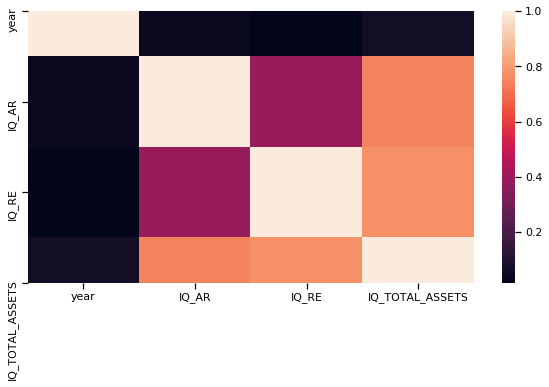

In [12]:
sns.set_context("notebook")
#sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.heatmap(dataset_bal.corr())

In [7]:
dataset_merge = pd.merge(dataset,dataset_bal , on= ['company','year'])

In [8]:
scaler = StandardScaler()

In [10]:
dataset_scale = dataset_merge.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_TOTAL_REV','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = dataset_scale[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset_scale[col_names] = features
print(dataset_scale)

         company    year quarter_x   IQ_EBIT  IQ_TOTAL_OTHER_OPER  \
0    IQ102267046  2014.0        Q4 -0.115205            -0.397512   
1    IQ102267046  2015.0        Q4 -0.126429            -0.367602   
2    IQ102267046  2016.0        Q4 -0.101746            -0.306400   
3    IQ105654219  2014.0        Q4 -0.128907            -0.380838   
4    IQ105654219  2015.0        Q4 -0.119908            -0.366048   
..           ...     ...       ...       ...                  ...   
669     IQ916962  2018.0        Q4 -0.078297            -0.265227   
670   IQ98337381  2018.0        Q4 -0.160250            -0.045295   
671   IQ99319692  2018.0        Q4 -0.097347            -0.318682   
672     IQ997963  2018.0        Q4 -0.316205             0.182213   
673     IQ998042  2018.0        Q4 -0.195553            -0.195821   

     IQ_OPER_INC  IQ_TOTAL_REV quarter_y     IQ_AR     IQ_RE  IQ_TOTAL_ASSETS  
0      -0.115205     -0.272126        Q4 -0.148850 -0.033899        -0.220738  
1      -0.1

In [11]:
dataset_scale = dataset_scale.drop(['quarter_x','quarter_y'],axis=1)

In [13]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS
0,IQ102267046,2014.0,-0.115205,-0.397512,-0.115205,-0.272126,-0.148850,-0.033899,-0.220738
1,IQ102267046,2015.0,-0.126429,-0.367602,-0.126429,-0.254275,-0.122355,-0.033359,-0.209926
2,IQ102267046,2016.0,-0.101746,-0.306400,-0.101746,-0.206847,-0.039130,-0.026067,-0.176492
3,IQ105654219,2014.0,-0.128907,-0.380838,-0.128907,-0.265146,-0.190261,-0.024990,-0.218634
4,IQ105654219,2015.0,-0.119908,-0.366048,-0.119908,-0.259967,-0.191272,-0.017943,-0.211559


In [14]:
dataset_scale.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS
count,674.000000,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02
mean,2016.148368,-3.582693e-18,1.069043e-16,-3.582693e-18,4.295114e-17,2.512003e-18,-7.618370e-19,-3.249132e-17
std,1.393662,1.000743e+00,1.000743e+00,1.000743e+00,1.000743e+00,1.000743e+00,1.000743e+00,1.000743e+00
min,2014.000000,-6.092794e+00,-4.560434e-01,-6.092794e+00,-3.043984e-01,-2.141881e-01,-4.191716e+00,-2.438678e-01
25%,2015.000000,-1.675260e-01,-3.532748e-01,-1.675260e-01,-2.643191e-01,-1.935558e-01,-1.033221e-01,-2.185825e-01
50%,2016.000000,-1.069972e-01,-2.523334e-01,-1.069972e-01,-2.271627e-01,-1.716776e-01,-2.968238e-02,-1.943489e-01
75%,2017.000000,-2.302399e-02,-4.078226e-02,-2.302399e-02,-1.230222e-01,-1.194888e-01,1.934464e-03,-1.129375e-01
max,2018.000000,1.002251e+01,1.081088e+01,1.002251e+01,9.711437e+00,1.154845e+01,1.385897e+01,1.380242e+01


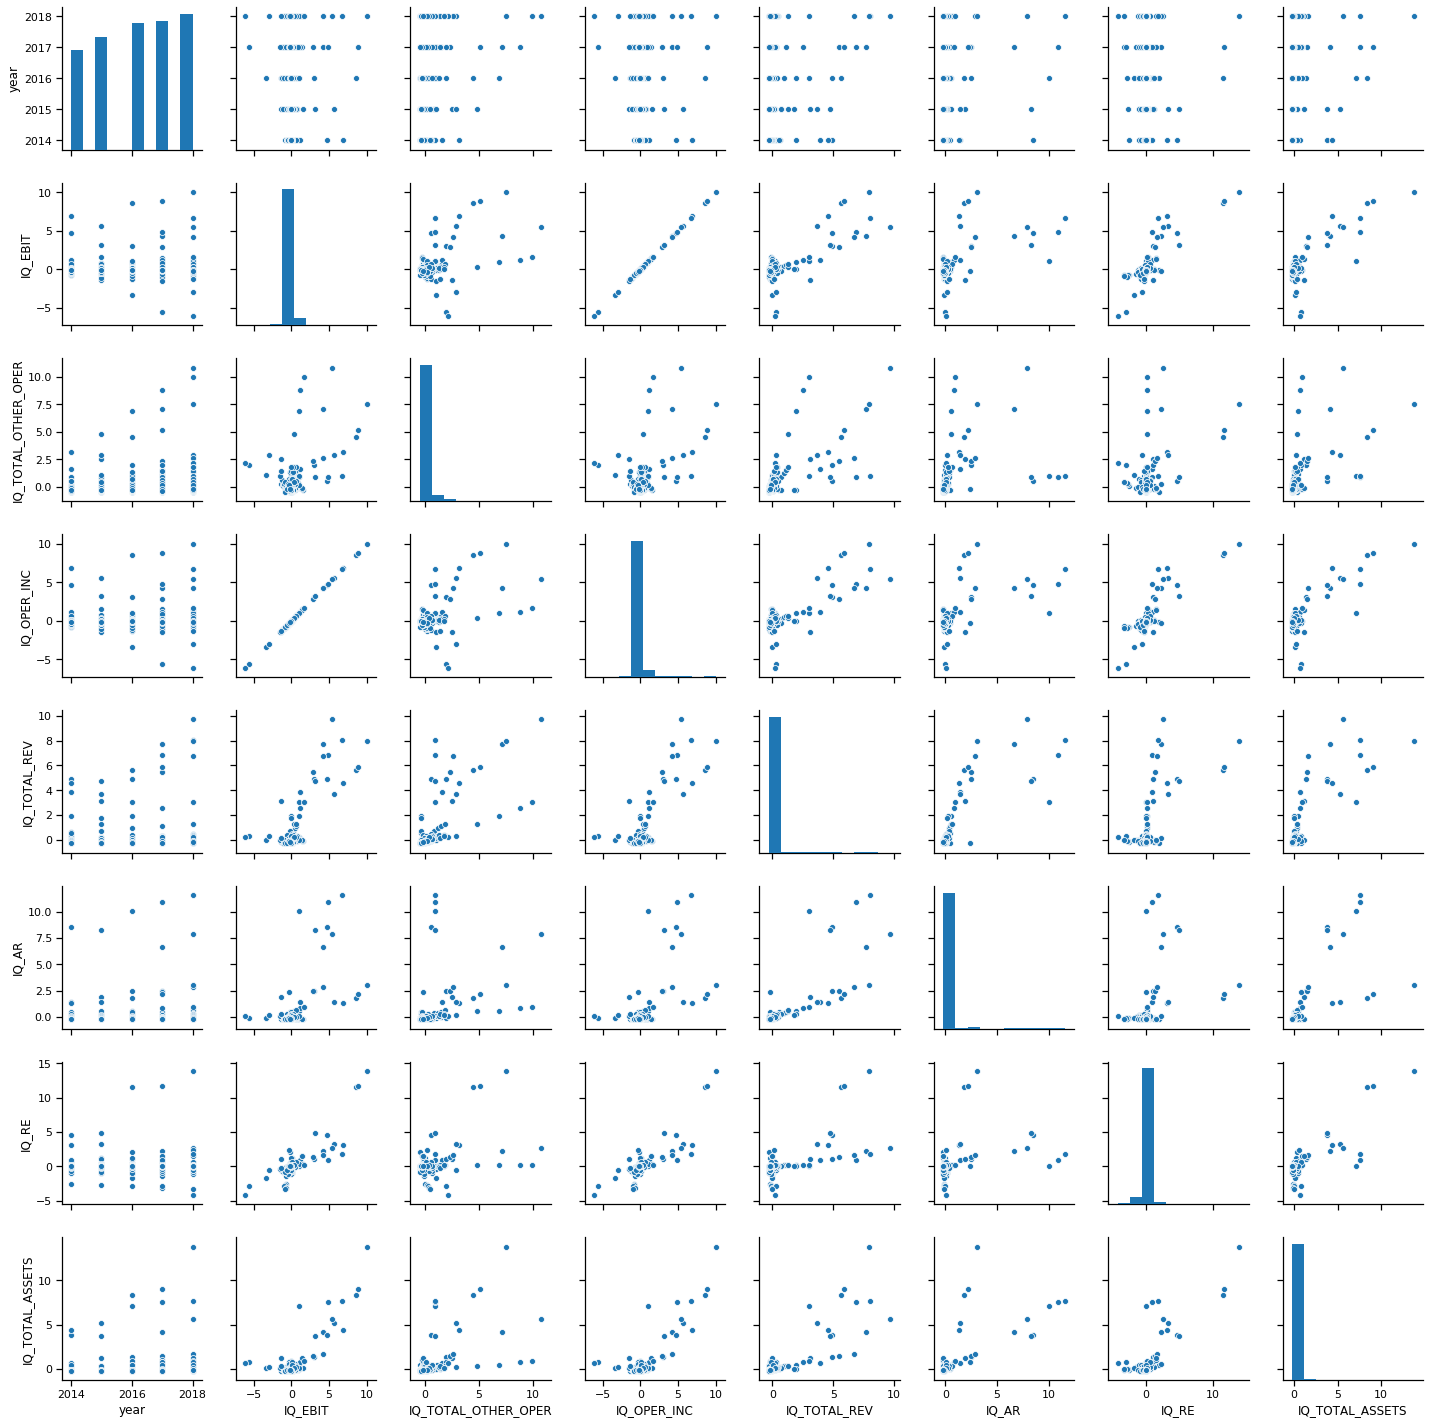

In [15]:

sns.set_context("notebook")
sns.pairplot(dataset_scale)

In [17]:
inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
    

X = dataset_scale.loc[:,'IQ_EBIT':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, init = 'random', random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score

Text(0.5, 1.0, 'Silhouetter Score Curve')

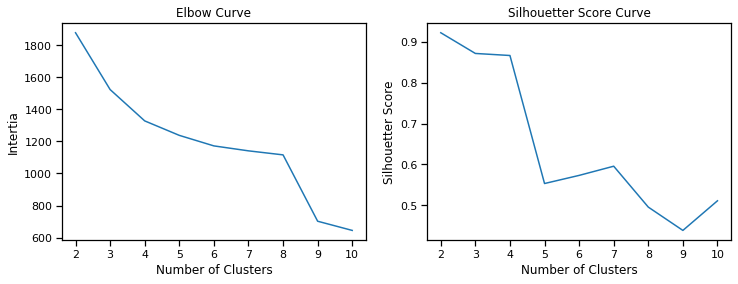

In [18]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [19]:
# We retain 3 clusters due to inertia and the silhouette curve
n_former_cluster = 4
y_pred = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)

In [20]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 642
1 12
2 11
3 9


In [21]:
clusters  = pd.Series(y_pred.labels_)
dataset_scale = dataset_scale.assign(centroids=clusters.values)

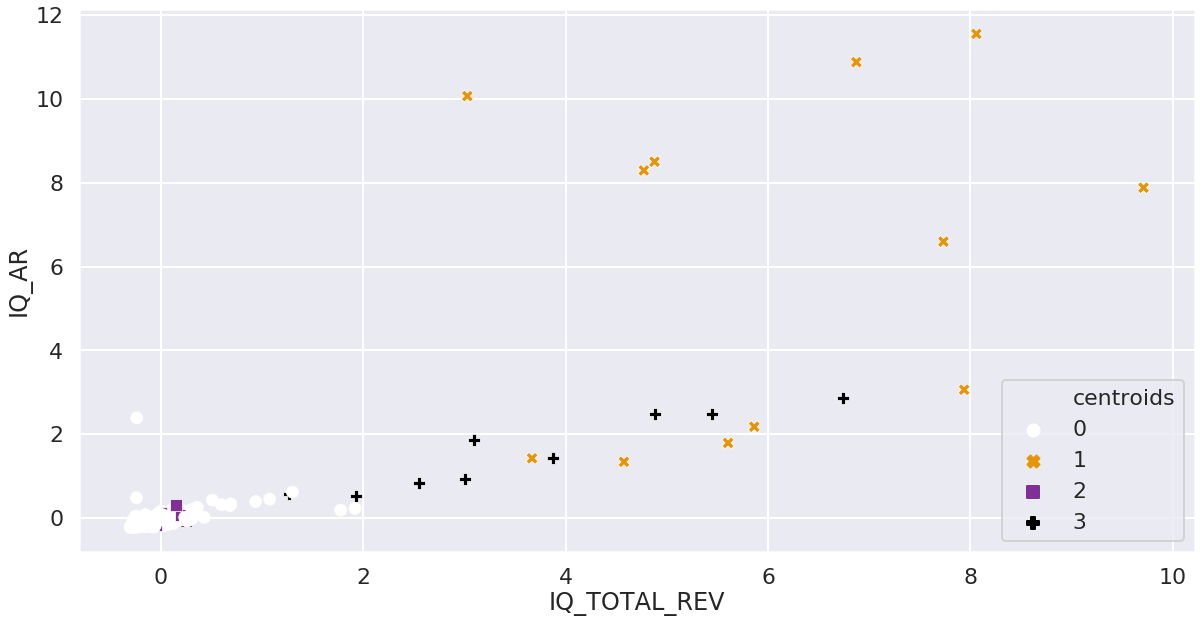

In [22]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

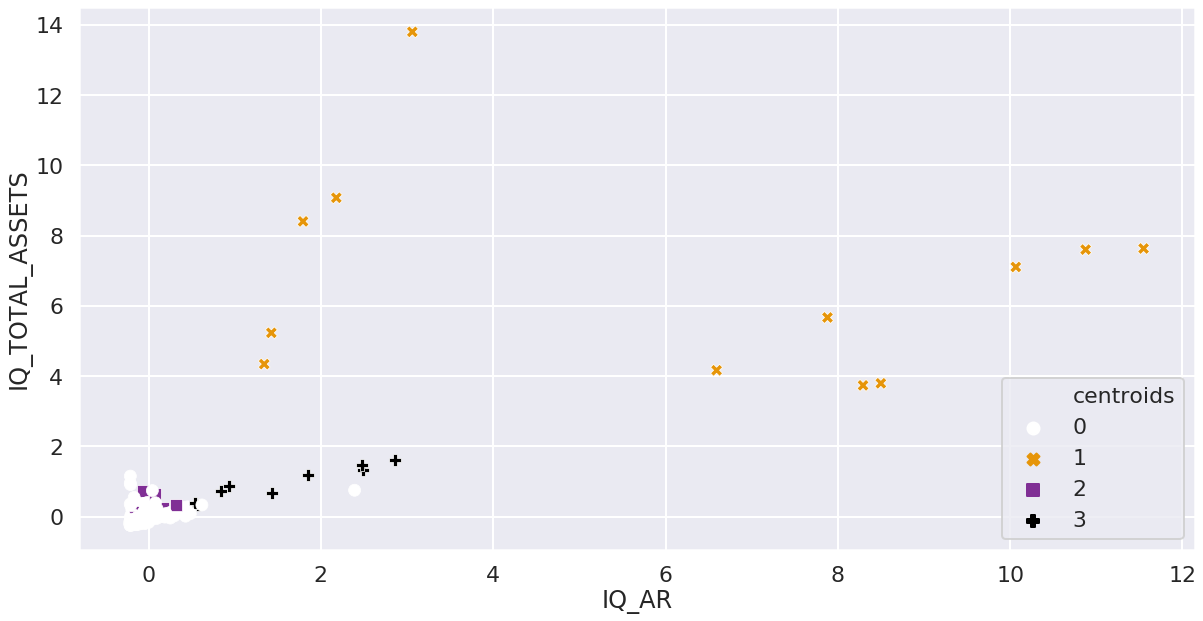

In [23]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_AR", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [24]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,centroids
0,IQ102267046,2014.0,-0.115205,-0.397512,-0.115205,-0.272126,-0.148850,-0.033899,-0.220738,0
1,IQ102267046,2015.0,-0.126429,-0.367602,-0.126429,-0.254275,-0.122355,-0.033359,-0.209926,0
2,IQ102267046,2016.0,-0.101746,-0.306400,-0.101746,-0.206847,-0.039130,-0.026067,-0.176492,0
3,IQ105654219,2014.0,-0.128907,-0.380838,-0.128907,-0.265146,-0.190261,-0.024990,-0.218634,0
4,IQ105654219,2015.0,-0.119908,-0.366048,-0.119908,-0.259967,-0.191272,-0.017943,-0.211559,0


1.0
[0.96888889 0.98666667 0.97321429]
Accuracy score: 0.9585798816568047


/home/perihan_balat86/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[Text(1594.2857142857142, 1993.2, 'X[5] <= 2.449\nentropy = 0.713\nsamples = 505\nvalue = [[2143.603, 33.045]\n[1462.593, 714.055]\n[1461.156, 715.492]\n[1462.593, 714.055]]'),
 Text(1275.4285714285713, 1630.8000000000002, 'X[3] <= 1.923\nentropy = 0.539\nsamples = 497\nvalue = [[1429.548, 33.045]\n[1462.593, 0.0]\n[747.1, 715.492]\n[748.537, 714.055]]'),
 Text(956.5714285714284, 1268.4, 'X[2] <= -0.772\nentropy = 0.13\nsamples = 489\nvalue = [[715.492, 33.045]\n[748.537, 0.0]\n[33.045, 715.492]\n[748.537, 0.0]]'),
 Text(637.7142857142857, 906.0, 'X[6] <= -0.11\nentropy = 0.004\nsamples = 14\nvalue = [[715.492, 0.48]\n[715.972, 0.0]\n[0.48, 715.492]\n[715.972, 0.0]]'),
 Text(318.85714285714283, 543.5999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [[0.0, 0.343]\n[0.343, 0.0]\n[0.343, 0.0]\n[0.343, 0.0]]'),
 Text(956.5714285714284, 543.5999999999999, 'X[4] <= -0.159\nentropy = 0.001\nsamples = 9\nvalue = [[715.492, 0.137]\n[715.629, 0.0]\n[0.137, 715.492]\n[715.629, 0.0]]'),
 Text(637

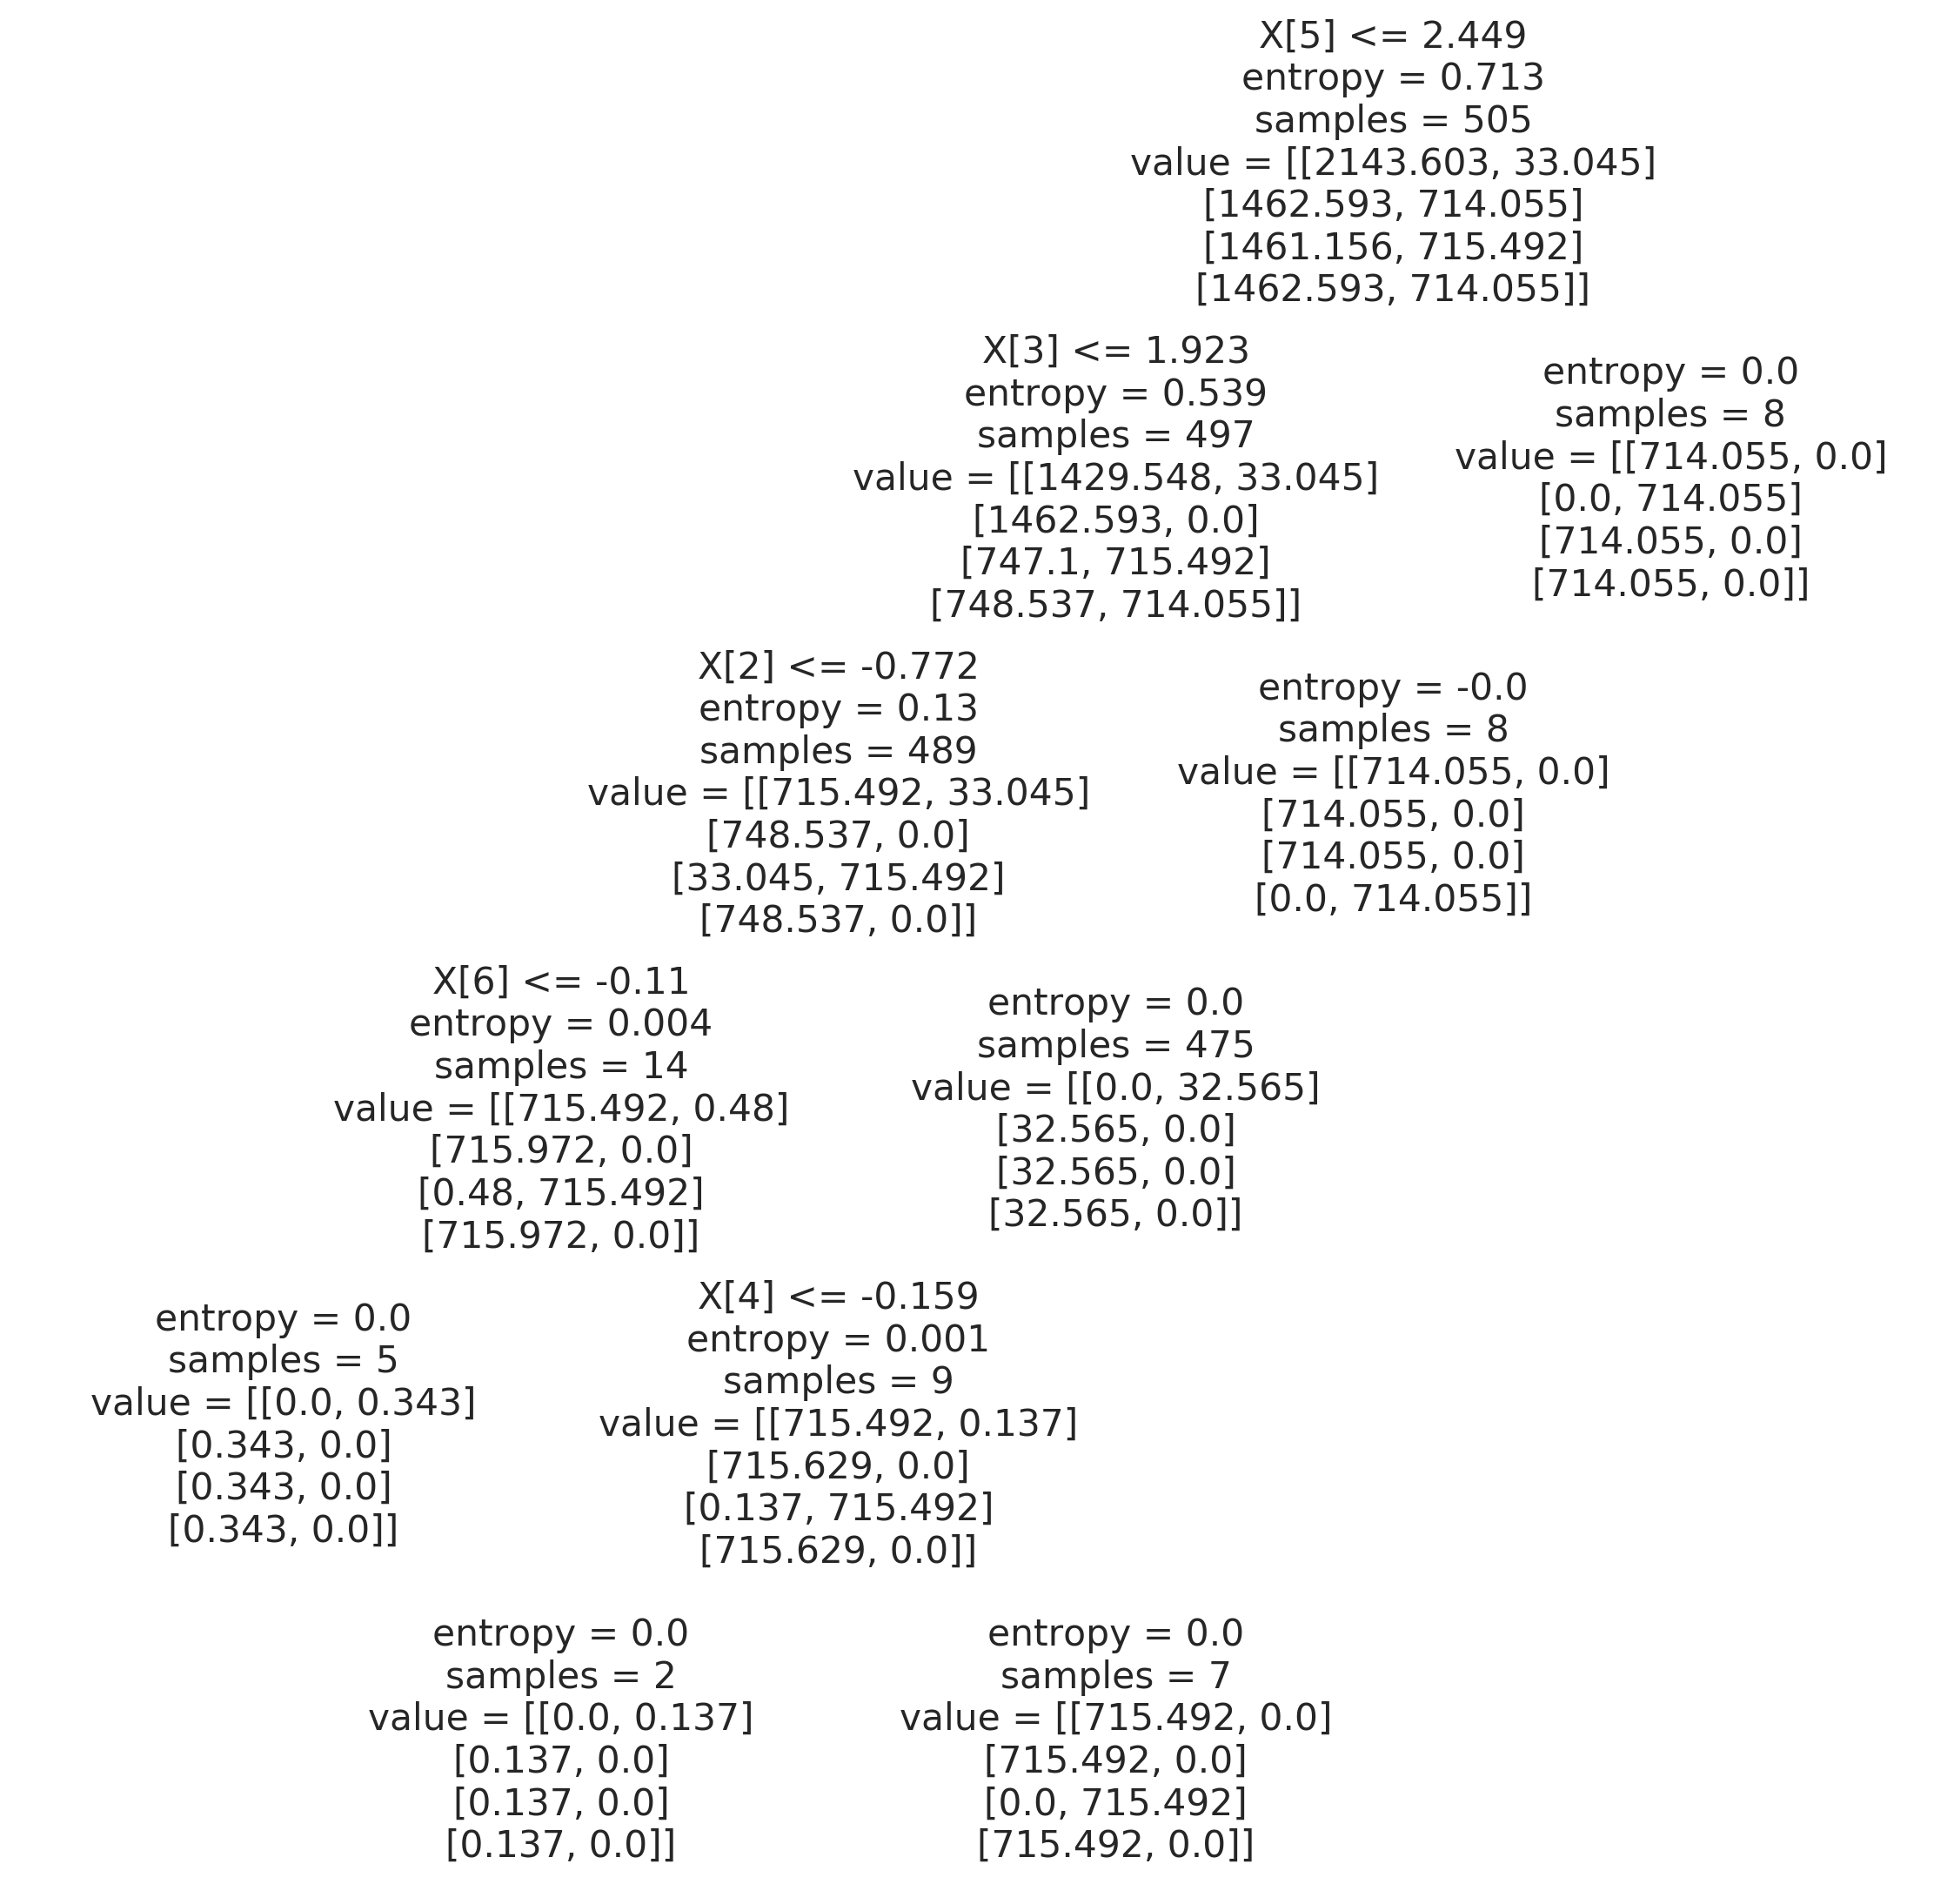

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
X_scale  = dataset_scale.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"]
y_scale = pd.get_dummies(dataset_scale.loc[:,"centroids"])
X_scale_train,X_scale_test,y_scale_train,y_scale_test = train_test_split(X_scale,y_scale,random_state=0)
clf = tree.DecisionTreeClassifier(class_weight="balanced",criterion = "entropy",max_leaf_nodes = 6,random_state = 0)
clf.fit(X_scale_train, y_scale_train)
print(clf.score(X_scale_train,y_scale_train))
print(cross_val_score(clf,X_scale,y_scale))

y_pred_new = clf.predict(X_scale_test)
print("Accuracy score:",  metrics.accuracy_score(y_scale_test,y_pred_new))
tree.plot_tree(clf)

In [26]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= dataset_scale.columns[2:9],  
                      class_names= dataset_scale.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("privatedecisiontreeincome")

'privatedecisiontreeincome.pdf'

In [27]:
# Count the number of element of a cluster depending 
def count_num_element(df,list_index,num_cluster,value = 1):
    return np.count_nonzero(df.loc[list_index][num_cluster]==value)
#np.count_nonzero(y_scale_train.loc[dataset_index_02][0]==1)
#count_num_element(y_scale_train,dataset_index_02,0)

In [28]:
def count_cluster_num_element(df, cluster_num):
    return len(df[df[cluster_num]== 1])
print("cluster 0: ",count_cluster_num_element(y_scale_train, 0))
print("cluster 1: ",count_cluster_num_element(y_scale_train, 1))
print("cluster 2: ",count_cluster_num_element(y_scale_train, 2))
print("cluster 3: ",count_cluster_num_element(y_scale_train, 3))

cluster 0:  482
cluster 1:  8
cluster 2:  7
cluster 3:  8


In [32]:
# Get the index of points where IQ_NET_INTEREST_EXP > 3.064
dataset_index_00 = X_scale_train[X_scale_train['IQ_RE']> 2.449].index.tolist()
#print(dataset_index_00)

0


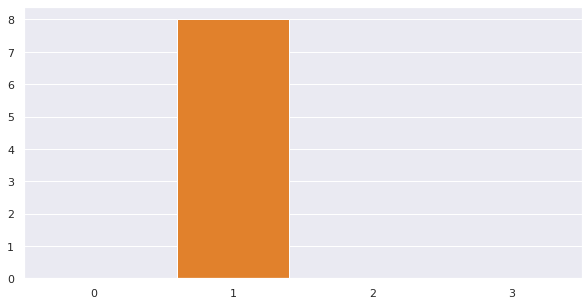

In [33]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > 3.064
num0 = count_num_element(y_scale_train,dataset_index_00,0)
print(num0)
num1 = count_num_element(y_scale_train,dataset_index_00,1)
num2 = count_num_element(y_scale_train,dataset_index_00,2)
num3 = count_num_element(y_scale_train,dataset_index_00,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

In [35]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP <= 3.064
num0 = count_num_element(y_scale_train,dataset_index_01,0)
num1 = count_num_element(y_scale_train,dataset_index_01,1)
num2 = count_num_element(y_scale_train,dataset_index_01,2)
num3 = count_num_element(y_scale_train,dataset_index_01,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

NameError: name 'dataset_index_01' is not defined